# Lab 5:  Variability and the Normal Distribution

## Due Saturday, November 18th at 11:59PM

Welcome to Lab 5! In this lab you will practice calculating variance and standard deviation, and converting values to standard units. You will use these skills to compare grades in a course and you will use Chebyshev’s inequality to predict how hard the students should work in order to rank in the top 5% of the class. Finally, you will use confidence intervals to help college administrators plan for next quarter by predicting the enrollment in a new course. The topics from this lab are covered in the following readings:
* [CIT 14.2](https://www.inferentialthinking.com/chapters/14/2/Variability.html): Variability, Standard Deviation, Standard units, Chebyshev's Bounds.
* [CIT 14.3](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html): The Standard Deviation (SD) and the Normal Curve 
* [CIT 14.4](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html): The Central Limit Theorem
* [CIT 14.5](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html): The Variability of the Sample Mean
* [CIT 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html): Choosing a Sample Size

You should complete this entire lab so that all tests pass and submit it to Gradescope by 11:59PM on the due date.

As usual, **run the cell** below to prepare the lab and the automatic tests.

In [1]:
import numpy as np
import babypandas as bpd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import otter
grader = otter.Notebook()
%reload_ext pandas_tutor

## 1. Comparing Grades Using Standard Units

Two of your friends, Jasmine and Chaninder, just took their midterms. Jasmine took her BILD 1 midterm and Chaninder took his MATH 18 midterm. Jasmine received a **B+** on her midterm (87%) and Chaninder received an **A-** (92%). Jasmine claims that while she received a lower grade on her midterm, she actually did better (relative to the rest of the class) than Chaninder. Chaninder disagrees. Knowing that you are taking DSC 10, your two friends come to you to settle their argument. 

They show you two DataFrames: `bild_midterm` and `math_midterm` that represent the grades for their classes. Both exams are out of 100 points.  Each DataFrame has a column called `'Student'` with student ID numbers and `'Score'` with the midterm scores.

_Note:_ You do ***not*** need to make any changes to the below cell. It is for you to visualize the two datasets.

Jasmine's Score (BILD 1): 87
Chaninder's Score (MATH 18): 92


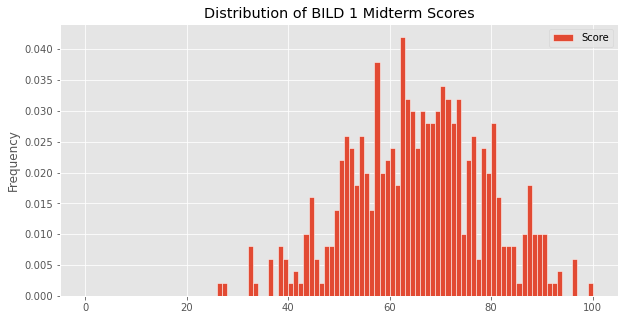

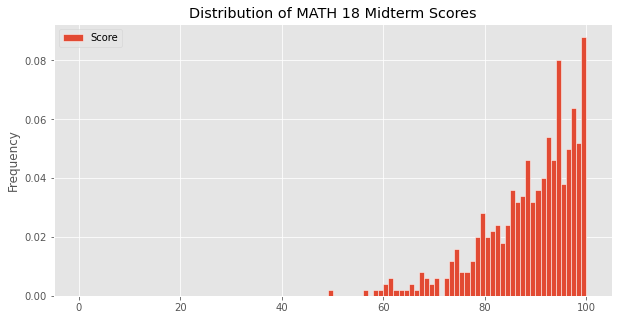

In [2]:
# Jasmine's exam
bild_midterm = bpd.read_csv("data/bild1_scores.csv")
bild_midterm.plot(y='Score', kind='hist', density=True, bins=range(0, 101, 1), ec='w', title='Distribution of BILD 1 Midterm Scores')
Jasmine_score = 87
print("Jasmine's Score (BILD 1): " + str(Jasmine_score))

# Chaninder's exam
math_midterm = bpd.read_csv("data/math18_scores.csv")
math_midterm.plot(y='Score', kind='hist', density=True, bins=range(0, 101, 1), ec='w', title='Distribution of MATH 18 Midterm Scores')
Chaninder_score = 92
print("Chaninder's Score (MATH 18): " + str(Chaninder_score))

You know that instead of comparing their actual scores, you should first convert their scores into **standard units**. Recall from [Lecture 17](https://dsc10.com/resources/lectures/lec17/lec17.html#Standard-units) that if $x$ is a numerical variable, and $x_i$ is one value of the variable, then

$$x_{i \: \text{(su)}} = \frac{x_i - \text{mean of $x$}}{\text{SD of $x$}}$$

represents $x_i$ in **standard units** – the number of standard deviations $x_i$ is above the mean.

To compute the midterm score in standard units for each friend, we need to:
1. Compute the **average** grade for each class. We will use the Series method `.mean()` to do this.
2. Compute the **standard deviation** (SD) of the midterm scores for each class. We *could* use `np.std`, but we will write our own function to do that.

Note that standard deviation is the square root of variance. So, we'll proceed by defining a function that computes the **variance** first. Recall that the variance is the mean squared deviation from the average:

$$\text{variance} = \frac{(\text{value}_1 - \text{average})^2 + (\text{value}_2 - \text{average})^2 +...+ (\text{value}_n - \text{average})^2}{n}$$
where $n$ is the number of values (e.g. number of exam scores, in our case).


**Question 1.1.** Complete the function `compute_variance`. It takes as input a *Series of numbers* (`data`) and returns the variance as a single number. 

Then, use the `compute_variance` function to compute the variance of the two classes' midterm scores, and assign them to the two specified variable names.

**Do not** use `np.std` in your solution. Instead, use the above formula for variance as guidance.

In [3]:
def compute_variance(data):
    n = len(data)
    average = data.mean()
    sum_squared_diff = 0
    
    for i in np.array(data):
        sum_squared_diff += ((i - average) ** 2)
    
    variance = sum_squared_diff / n 
    return variance


bild_midterm_var = compute_variance(bild_midterm.get('Score'))
print("Variance of BILD 1 midterm: " + str(bild_midterm_var))

math_midterm_var = compute_variance(math_midterm.get('Score'))
print("Variance of MATH 18 midterm: " + str(math_midterm_var))

Variance of BILD 1 midterm: 173.20529599999983
Variance of MATH 18 midterm: 84.26559999999982


In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Now that we have a function that computes the variance, we want to write a function that computes the standard deviation. Fill in the missing code to complete the function `compute_sd`. It takes as input a *series of numbers* (`data`) and returns the *standard deviation* as a single number. 

Then, use the `compute_sd` function to compute the standard deviation of scores of the two midterms.

_Hint:_ Your implementation of `compute_sd` should only take ***one line***, that involves both the `return` keyword and the function `compute_variance`.

<!--
BEGIN QUESTION
name: q1_2
-->

In [5]:
def compute_sd(data):
    return (compute_variance(data) ** (1 / 2))

bild_midterm_sd = compute_sd(bild_midterm.get('Score'))
print("Standard Deviation of BILD 1 midterm: " + str(bild_midterm_sd))

math_midterm_sd = compute_sd(math_midterm.get('Score'))
print("Standard Deviation of MATH 18 midterm: " + str(math_midterm_sd))

Standard Deviation of BILD 1 midterm: 13.160748306992268
Standard Deviation of MATH 18 midterm: 9.179629622157956


In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Now that you can compute the standard deviation, you are equipped to write a function that converts a given score to standard units. Fill in the missing code to complete the function `compute_su`. It takes in a *score* (`score`), the *average score* (`avg`), and the *standard deviation* (`sd`), and returns the score in standard units.

Then, use the `compute_su` function to transform the scores earned by each friend into standard units.

**Warning**: Be careful with the order of operations!

In [7]:
def compute_su(score, avg, sd):
    standard_units = (score - avg) / sd
    return standard_units

Jasmine_su = compute_su(Jasmine_score, bild_midterm.get('Score').mean(), compute_sd(bild_midterm.get('Score')))
print("Jasmine's Score in Standard Units: " + str(Jasmine_su))

Chaninder_su = compute_su(Chaninder_score, math_midterm.get('Score').mean(), compute_sd(math_midterm.get('Score')))
print("Chaninder's Score in Standard Units: " + str(Chaninder_su))

Jasmine's Score in Standard Units: 1.6676863266459616
Chaninder's Score in Standard Units: 0.38345773684630546


In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Jasmine's score *is* higher than Chaninder's score when we convert to standard units, which can be seen as evidence that she did better on her exam relative to her classmates than Chaninder did relative to his. 

Another way to measure their relative performances is to calculate, for both Jasmine and Chaninder individually, the proportion of students they scored higher than (or the same as). Comparing Jasmine's proportion to Chaninder's proportion will give us another way of measuring who did better relative to their classmates. Calculate Jasmine's proportion and Chaninder's proportion below. (This will require looking at both `bild_midterm` and `math_midterm`.)

In [9]:
Jasmine_proportion = np.count_nonzero(bild_midterm.get('Score') <= Jasmine_score) / bild_midterm.shape[0]
print("Jasmine's Proportion: " + str(Jasmine_proportion))

Chaninder_proportion = np.count_nonzero(math_midterm.get('Score') <= Chaninder_score) / math_midterm.shape[0]
print("Chaninder's Proportion: " + str(Chaninder_proportion))

Jasmine's Proportion: 0.954
Chaninder's Proportion: 0.582


In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

## 2. Chebyshev's Bounds and Normal Curves

Lets look at the histograms of the scores of the two midterms again.

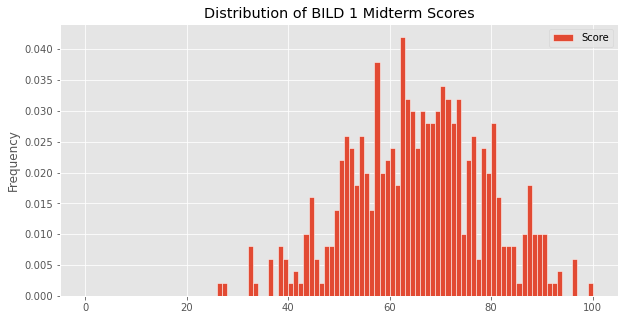

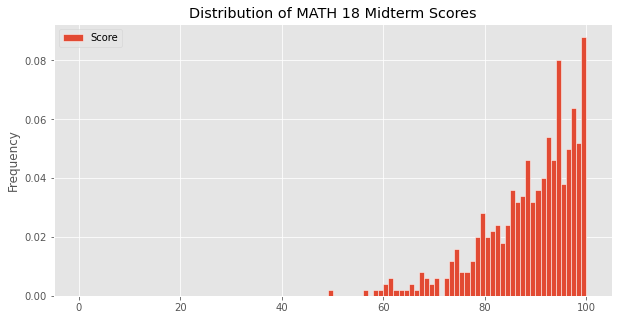

In [11]:
bild_midterm.plot(y='Score', kind='hist', density=True, bins=range(0, 101, 1), ec='w', title='Distribution of BILD 1 Midterm Scores');
math_midterm.plot(y='Score', kind='hist', density=True, bins=range(0, 101, 1), ec='w', title='Distribution of MATH 18 Midterm Scores');

**Question 2.1.** Which of the two graphs roughly resembles a normal curve? Assign the variable `q2_1` to either 1, 2, 3, or 4.

1. Only the first graph (distribution of BILD 1 midterm scores) is roughly normal.
2. Only the lower graph (distribution of MATH 18 midterm scores) is roughly normal.
3. Both graphs are roughly normal.
4. Neither graph is roughly normal.

Remember all normal curves have the following characteristics:

* The mean (average) is always in the center of a normal curve.
* A normal curve has only one mode (peak).

In [12]:
q2_1 = 1
q2_1

1

In [13]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.**
By looking at the distribution of MATH 18 midterm scores above, rank the following values in order **from smallest to largest**.

1. The mean score.
2. The median score.
3. The most common score (the mode).

Set variable `q2_2` to a list containing the numbers 1, 2, 3 **in the appropriate order**. Don't compute any of these values manually!

In [14]:
q2_2 = [1, 2, 3]
q2_2

[1, 2, 3]

In [15]:
grader.check("q2_2")

q2_2 results: All test cases passed!

### Recap: Chebyshev's inequality (i.e. Chebyshev's bounds)

Chebyshev's inequality states that *no matter what the shape of the distribution* is, the proportion of the values that fall in the range

$$\mbox{average} \pm z \mbox { Standard Deviations}$$
is at least 
$$1 - \frac{1}{z^{2}}$$ 

**It's important to note that these are lower bounds, not approximations:** 75% of the data is guaranteed to lie within plus or minus of 2 standard deviations of the mean, but 100% of the data might also lie within plus or minus 2 standard deviations of the mean. 

### On the other hand...
**If we know that our data forms a normal curve**, the standard deviation is even more informative.

|Percent in Range | All Distributions (via Chebyshev's Inequality) | Normal Distributions|
|---|---|---|
|$\text{average} \pm 1 \ \text{SD}$ | $\geq 0\%$ | $\approx 68\%$ |
|$\text{average} \pm 2\text{SDs}$ | $\geq 75\%$ | $\approx 95\%$ |
|$\text{average} \pm 3\text{SDs}$ | $\geq 88\%$ | $\approx 99.73\%$ |

**Note that for a normal distribution, the numbers in the last column of the DataFrame above are approximations, not lower bounds.**  
* If the distribution is perfectly normal, then 68% of the data (not more, not less) will lie between plus and minus one standard deviation of the mean. 
* Additionally because a normal curve is symmetric, we know that 34% of the data lies between the average and the average plus one standard deviation. 
 


**Question 2.3.**  Jasmine, who is Pre-Med, really wanted to score in the top 5% of the class. But before taking the exam, she did not know if the scores would be normally distributed or not. 

Without making any assumptions about the distribution of scores, how many standard deviations above the mean would she have needed to score to **guarantee** that she fell in the top 5% of the the class? Set the variable `q2_3` to either 1, 2, 3, or 4, depending on your answer. 


1. Jasmine would need to score roughly 4.5 standard deviations above the average to guarantee being in the top five percent. Using Chebyshev's inequality, setting $z = \sqrt{20} \approx 4.5$  gives that 95% of the data will lie between plus or minus 4.5 SDs. If Jasmine scores above 4.5 SDs, then she is guaranteed to have scored better than 95% of the other students. 

2. Jasmine would need to score above 2 SDs. Since 95% of the data falls between plus or minus 2 SDs, if Jasmine scores above 2 SDs, she is guaranteed to score above 95% of the class. 

3. Jasmine would need to score slightly less than 2 SDs. 50% of the class will have scored below the average. Which means that if Jasmine scores 2 standard deviations above the average she'll have scored higher than 50% + (95% / 2) = 97.5%. 

4. No matter how many standard deviations above the mean Jasmine scores, there is no guarantee that she will score in the top 5% of the class. 

In [16]:
q2_3 = 1
q2_3

1

In [17]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Now, assuming that the scores for the exam will be normally distributed (as many exams are), what is the minimum number of standard deviations above the mean Jasmine would have needed to score to **guarantee** that she fell in the top 5% of the class? Set variable `q2_4` to either 1, 2, 3, or 4, depending on your answer. 


1. Jasmine would need to score roughly 4.5 standard deviations above the average to guarantee being in the top five percent. Using Chebyshev's inequality, setting $z = \sqrt{20} \approx 4.5$  gives that 95% of the data will lie between plus or minus 4.5 SDs. If Jasmine scores above 4.5 SDs, then she is guaranteed to have scored better than 95% of the other students. 

2. Jasmine would need to score above 2 SDs. Since 95% of the data falls between plus or minus 2 SDs, if Jasmine scores above 2 SDs, she is guaranteed to score above 95% of the class. 

3. Jasmine would need to score slightly less than 2 SDs. 50% of the class will have scored below the average. Which means that if Jasmine scores 2 standard deviations above the average she'll have scored higher than 50% + (95% / 2) = 97.5% of the class.

4. No matter how many standard deviations above the mean Jasmine scores, there is no guarantee that she will score in the top 5% of the class.

In [18]:
q2_4 = 3
q2_4

3

In [19]:
grader.check("q2_4")

q2_4 results: All test cases passed!

Jasmine and Chaninder thank you for your analysis 👋, and go on their way to start studying for their finals, which are just around the corner.

## 3. Choosing Sample Size

A new class is being offered at UCSD and the administration wants to know how many students will be taking the class so they know how big of a classroom it will need. To take the class, a student must have satisfied the prerequisites first. 

The administration knows there are 900 students who have completed the prerequisites and are eligible to take the class, but they don't know how many will actually enroll. They don't have the resources to ask each eligible student whether they are going to enroll, so they decide to ask a sample of the students, but they don't know how many students to ask. They want the width of their confidence interval to be **at most 10 students**. 

For example, if the results of their sample concluded that with 95% confidence between 200 and 210 students would take the class, the administration would be happy with that sample. However if the results of the sample concluded that with 95% confidence between 200 and 300 students would take the class, the sample would not have been informative enough because that range is too wide. We are going to help determine how big of a sample the administration should take. 

The population parameter we are interested in measuring is the proportion of eligible students who will take the class. We will estimate this using a sample statistic, the proportion of eligible students in the sample who plan to take the class. 

So **where do we start**?

The Central Limit Theorem tells us that regardless of the distribution of our population, the distribution of the sample mean or sum will always be roughly normal. Fortunately, our sample statistic (the proportion of eligible students who will take the class) is also a sample mean, because proportions are just means of 0s and 1s. Let's run a simulation to see this for ourselves. 

Below is the data for the whole population of eligible students. (If the administration had the resources to ask every student whether they were going to take the class, this is what they would see. `0` means they won't take the class and `1` means they will.)

In [20]:
population = bpd.read_csv("data/population.csv")
population

,StudentID,Planning on taking
0,1,1
1,2,0
2,3,1
3,4,1
4,5,0
...,...,...
895,896,0
896,897,1
897,898,1
898,899,1


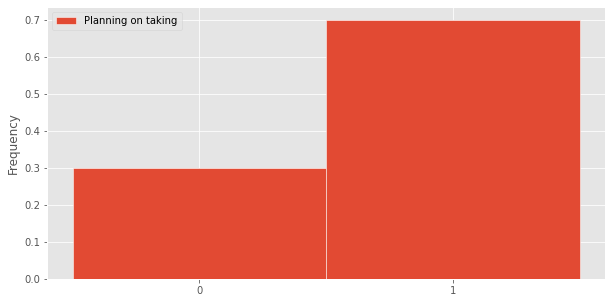

In [21]:
population.plot(y='Planning on taking', kind='hist', density=True, bins=np.arange(-0.5, 2.5, 1), ec='w');
plt.xticks([0, 1], [0, 1]);

**Question 3.1.** Below is partially implemented code to run a simulation. The simulation will repeatedly take samples of size `sample_size` (without replacement) from `population` and calculate the proportion of students who plan on taking the class. Fill in the missing parts. 

<!--
BEGIN QUESTION
name: q3_1
-->

In [22]:
def simulation(population, num_iterations, sample_size):
    results = np.array([])
    for i in np.arange(num_iterations):
        sampled = population.sample(sample_size, replace=False)
        proportion_taking_class = np.count_nonzero(sampled.get('Planning on taking') == 1) / sampled.shape[0]
        results = np.append(results, proportion_taking_class)
        
    bpd.DataFrame(data=results, columns=["Proportion"]).plot(kind='hist', 
                                                             y='Proportion', 
                                                             density=True,
                                                             ec='w',
                                                             bins=np.arange(0, 1, 1/(sample_size+1)),
                                                             title=f'Distribution of Sample Proportions (sample size = {sample_size})');
    plt.xlim(0, 1);
    
    return results


In [23]:
grader.check("q3_1")

q3_1 results: All test cases passed!

Run the cell below to see the empirical distribution of 10000 simulated sample proportions with a sample size of 40.

array([0.725, 0.575, 0.675, ..., 0.6  , 0.625, 0.7  ])

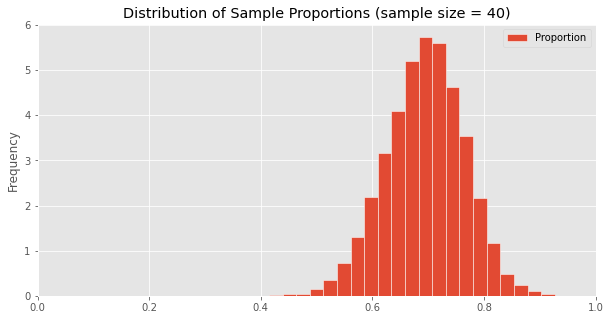

In [24]:
simulation(population, 10000, 40)

**Question 3.2.** Does the distribution of the sample proportion look more like a normal curve or more like the population distribution? 

1. More like a normal curve.

2. More like the original population.

In [25]:
q3_2 = 1
q3_2

1

In [26]:
grader.check("q3_2")

q3_2 results: All test cases passed!

We also know that as we increase the sample size, the standard deviation of our sample proportion's distribution will decrease. Again we decide to run a simulation to double check. Run the following cell to see how the distribution of the sample proportion changes as we increase the size of our sample. **It might take a while to run.** 

array([0.71111111, 0.66944444, 0.71111111, ..., 0.68611111, 0.71388889,
       0.68888889])

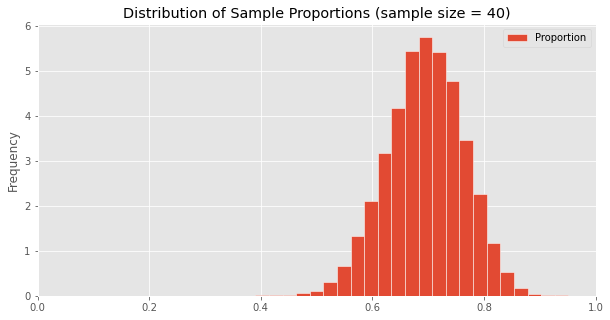

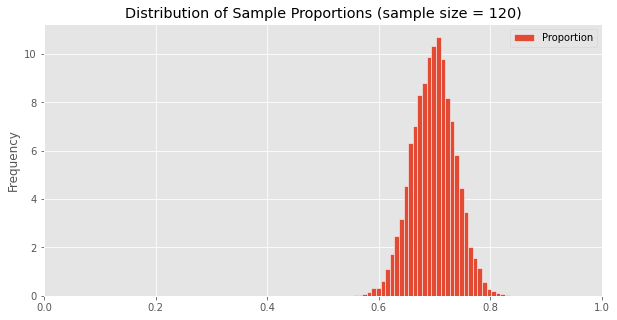

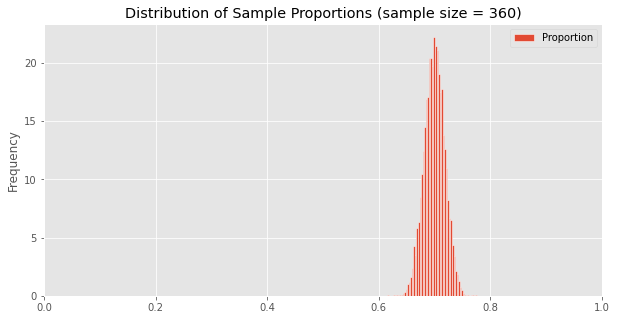

In [27]:
simulation(population, 10000, 40)
simulation(population, 10000, 120)
simulation(population, 10000, 360)

This trend is expressed by the formula
$$ \text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

Since proportions are means, we can use this formula to find the sample size we need to get a desired standard deviation of the sample proportion, and thus a certain confidence interval for that sample proportion. However, before taking our sample, we don't have any way of knowing the standard deviation of our population. Lecture 19, the [CIT](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html) textbook, and Homework 5 include some ways to get around this problem; here we will use the actual population standard deviation. 

**Question 3.3.** The administration wants the confidence interval to have a width of **10 students**, but we have been calculating the proportion of eligible students who are planning on taking the class. Fortunately, there is a relationship between a count and a proportion that will allow us to convert between these.

Using the total number of students who are eligible to take the class, determine what proportion of that number equals 10 students, and save the result as `width_as_proportion`. For example, if 500 students are eligible to take the class, then 10 students as a proportion is 0.02.

In [28]:
num_eligible_students = 900
print('Number of eligible students:', num_eligible_students)
width_as_proportion = 10 / num_eligible_students
print('Desired confidence interval width, as a proportion:', width_as_proportion)

Number of eligible students: 900
Desired confidence interval width, as a proportion: 0.011111111111111112


In [29]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Now let's calculate the standard deviation that our distribution of sample proportions would need to have in order for our 95% confidence interval to have a width of `width_as_proportion`. Set the variable `target_sd` to this value. 

Remember that for a normal distribution, 95% of the data lies between *plus and minus* 2 SDs of the mean. 

In [30]:
target_sd = width_as_proportion / 4
target_sd

0.002777777777777778

In [31]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** We also need to calculate the standard deviation of the total population. Calculate this value using the`compute_sd` function that you wrote earlier and store it in the variable `population_sd`.

In [32]:
population_sd = compute_sd(population.get('Planning on taking'))
population_sd

0.4582575694955866

In [33]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** Now calculate the required **sample size** and store your result as `req_sample_size`. Recall that

$$ \text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

You have already calculated $\text{SD of Distribution of Possible Sample Means}$, in Question 3.4, and $\text{Population SD}$, in Question 3.5.

In [34]:
req_sample_size = (population_sd / target_sd) ** 2
req_sample_size

27216.00000000031

In [35]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** Our required sample size is bigger than our entire population. For each part, say whether it is `True` or `False`.

1. The administration will have to settle for a wider interval to get 95% confidence.
2. Sampling with replacement will be a feasible way to determine the information the administration needs.
3. The administration will have to settle for a lower degree of confidence to get an interval of width 10.
4. We should increase the size of the population until the sample size is smaller than the size of the population.

Set each variable below to either `True` or `False`.


In [36]:
statement_1 = True
statement_2 = False
statement_3 = True
statement_4 = False

In [37]:
grader.check("q3_7")

q3_7 results: All test cases passed!

## Finish Line 🏁

Congratulations! You are done with Lab 5.

**Citations:** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [38]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!